># **K-Means Clustering ( Unsupervised Machine Learning )**

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

#### Importing and Loading the data set

In [3]:
df = pd.read_csv('website_traffic_data.csv')
df.head()

,Title,Keyword,Keyword ID,Position,Previous position,Last Seen,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results,Keyword Difficulty
0,PMP® Exam & Certification | Flat 40% Off - Enr...,PMP,3,1,1,31-12-2024,90500,3.76,4253,22.77,15991,24.66,0.60,166000000,78.0
1,PMP® Exam & Certification | Confidently Ace Th...,PMP,3,1,1,01-01-2025,90500,3.76,4253,22.77,15991,24.66,0.60,172000000,78.0
2,PMP® Training & Exam | Special Offer: Get $400...,PMP,3,1,2,14-01-2025,90500,3.82,1176,6.29,4492,6.92,0.65,154000000,77.0
3,CSM Scrum Master Course Online | Today's Offer...,Scrum Master,1,1,1,10-01-2025,18100,3.21,850,4.55,2728,4.20,0.64,32000000,70.0
4,PMP® Certification | Ace PMP Exam in 1st Attempt,PMP,3,3,3,07-01-2025,90500,3.82,814,4.35,3109,4.79,0.65,165000000,78.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               199 non-null    object 
 1   Keyword             199 non-null    object 
 2   Keyword ID          199 non-null    int64  
 3   Position            199 non-null    int64  
 4   Previous position   199 non-null    int64  
 5   Last Seen           199 non-null    object 
 6   Search Volume       199 non-null    int64  
 7   CPC                 199 non-null    float64
 8   Traffic             199 non-null    int64  
 9   Traffic (%)         199 non-null    float64
 10  Traffic Cost        199 non-null    int64  
 11  Traffic Cost (%)    199 non-null    float64
 12  Competition         199 non-null    float64
 13  Number of Results   199 non-null    int64  
 14  Keyword Difficulty  198 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 23.4+ KB

In [5]:
df.describe()

,Keyword ID,Position,Previous position,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results,Keyword Difficulty
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,1.990000e+02,198.000000
mean,5.216080,2.532663,2.391960,4711.608040,3.916985,93.829146,0.498945,325.819095,0.499347,0.381658,4.575325e+07,48.747475
std,2.905679,1.526761,1.559311,16003.015228,3.853916,446.718734,2.392012,1671.621365,2.578053,0.198629,1.462253e+08,16.954309
min,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.000000
25%,3.000000,1.000000,1.000000,70.000000,2.310000,0.500000,0.000000,0.000000,0.000000,0.185000,2.750000e+06,37.000000
50%,5.000000,2.000000,2.000000,170.000000,3.210000,3.000000,0.010000,7.000000,0.010000,0.410000,5.570000e+06,47.500000
75%,8.000000,4.000000,4.000000,1600.000000,4.485000,20.000000,0.100000,48.000000,0.070000,0.520000,3.170000e+07,60.000000
max,10.000000,6.000000,6.000000,90500.000000,46.860000,4253.000000,22.770000,15991.000000,24.660000,0.950000,1.400000e+09,97.000000


#### Checking for correlation between numerical fetures using Heatmap to understand the realaion.

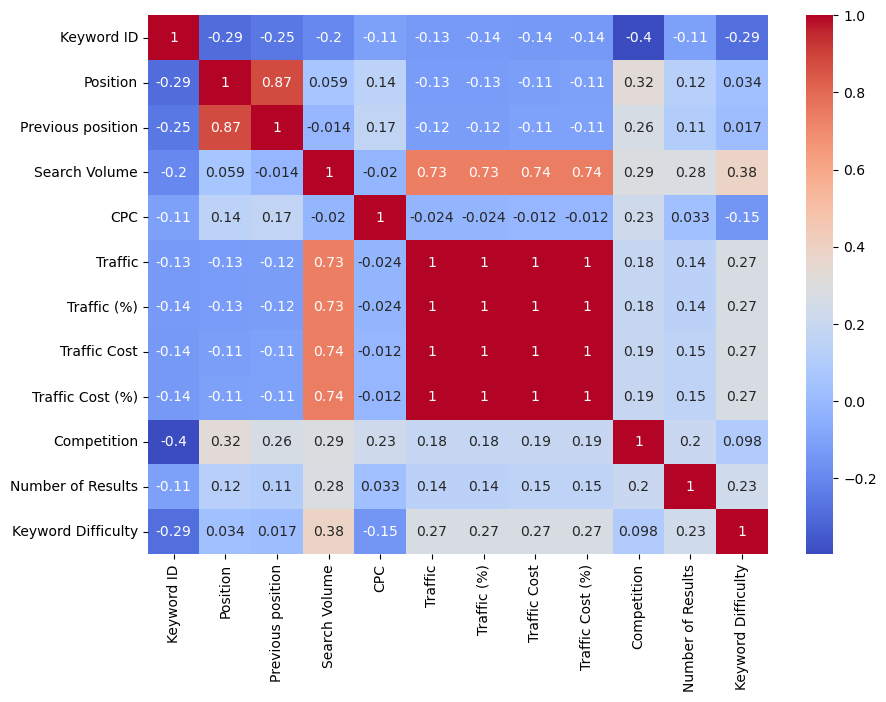

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

The analysis reveals a very strong positive correlation between Search Volume and the following metrics: Traffic, Traffic (%), Traffic Cost, and Traffic Cost (%). In all cases, the correlation coefficient exceeds 0.70, indicating that higher search volume is consistently associated with higher traffic and cost-related values. Additionally, these four metrics exhibit a perfect positive correlation with one another, with a correlation score of 1.00.

#### Taking the relevent numerical features for further analysis. So creating a subset of data.

In [7]:
data = pd.DataFrame(data=df, columns=['Traffic', 'Traffic (%)', 'Traffic Cost', 'Traffic Cost (%)', 'Search Volume'])
data.head()

,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Search Volume
0,4253,22.77,15991,24.66,90500
1,4253,22.77,15991,24.66,90500
2,1176,6.29,4492,6.92,90500
3,850,4.55,2728,4.20,18100
4,814,4.35,3109,4.79,90500


#### Removing duplicate if present

In [8]:
data.drop_duplicates(inplace=True, ignore_index=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Traffic           136 non-null    int64  
 1   Traffic (%)       136 non-null    float64
 2   Traffic Cost      136 non-null    int64  
 3   Traffic Cost (%)  136 non-null    float64
 4   Search Volume     136 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 5.4 KB


In [10]:
data.describe()

,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Search Volume
count,136.000000,136.000000,136.000000,136.000000,136.000000
mean,102.007353,0.541765,349.977941,0.535882,6107.573529
std,400.104551,2.142647,1493.770697,2.303850,17593.693841
min,0.000000,0.000000,0.000000,0.000000,30.000000
25%,2.000000,0.010000,5.000000,0.000000,110.000000
50%,7.000000,0.030000,20.000000,0.030000,435.000000
75%,47.250000,0.250000,101.250000,0.152500,2900.000000
max,4253.000000,22.770000,15991.000000,24.660000,90500.000000


#### Checking for null values

In [11]:
data.isnull().sum()

Traffic             0
Traffic (%)         0
Traffic Cost        0
Traffic Cost (%)    0
Search Volume       0
dtype: int64

#### Checking for outliers in data if present

In [12]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
iqr = Q3 - Q1
LB = Q1 - (1.5 * iqr)
UB = Q3 + (1.5 * iqr)
outliers = data[(data < LB) | (data > UB)]
outliers.sum()


Traffic              11769.00
Traffic (%)             62.96
Traffic Cost         43564.00
Traffic Cost (%)        67.11
Search Volume       704800.00
dtype: float64

#### Standerdizing the dataset using standerd scaler and ensure that no single feature dominates distance calculations in algorithm.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#### Now creating the standerdize data frame

In [14]:
data_scaled = pd.DataFrame(data=data_scaled, columns=['traffic', 'traffic(%)', 'traffic_cost', 'traffic_cost(%)', 'search_volume'])
data_scaled.head()

,traffic,traffic(%),traffic_cost,traffic_cost(%),search_volume
0,10.413124,10.412546,10.509541,10.509928,4.814476
1,2.694203,2.692691,2.783114,2.781309,4.814476
2,1.876404,1.877609,1.597845,1.596312,0.684152
3,1.786095,1.783921,1.853847,1.853351,4.814476
4,1.487573,1.488806,0.852683,0.851332,0.495891


#### Performing the Elbow Method to find the optimal number of clusters for further analysis.

In [15]:
from sklearn.cluster import KMeans

inertia_values = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

#### Visualizing the Elbow Method

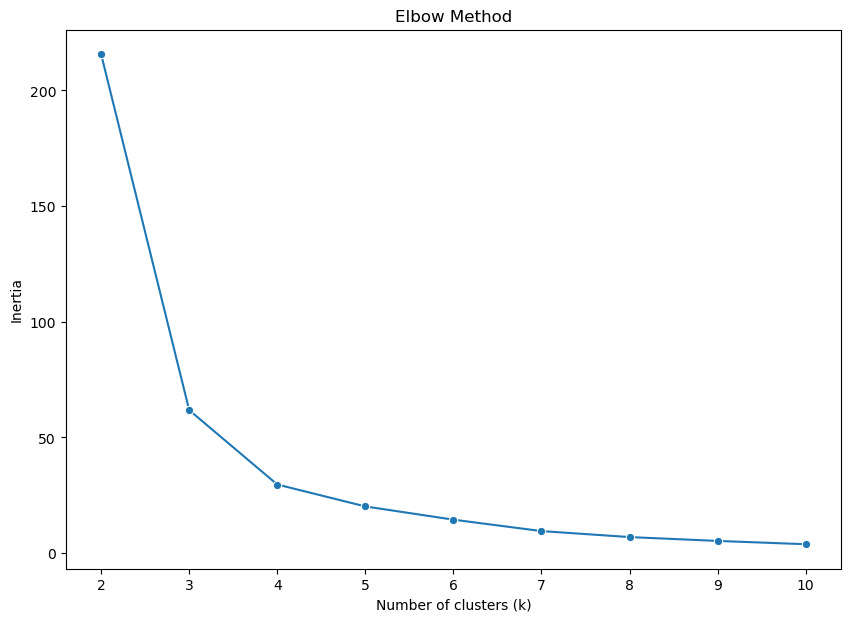

In [16]:

plt.figure(figsize=(10, 7))
sns.lineplot(x=list(cluster_range), y=inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

We are taking no of clusters 4 after observing the elbow method graph.

In [17]:
final_kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
final_kmeans.fit(data_scaled)
labels = final_kmeans.labels_

#### Using PCA (Principal Component Analysis) to reduce the number of features in your dataset while keeping as much of the important information as possible.

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled.values)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels
pca_df.head()

,PC1,PC2,Cluster
0,21.233696,-3.169775,1
1,6.857401,2.479044,2
2,3.483280,-0.641333,3
3,5.147656,3.150335,2
4,2.358754,-0.411163,3


#### Projecting the K-Means centroids into the same PCA space

In [19]:
centroids_pca = pca.transform(final_kmeans.cluster_centers_)

#### Plotting the scatter plot for cluster visualization

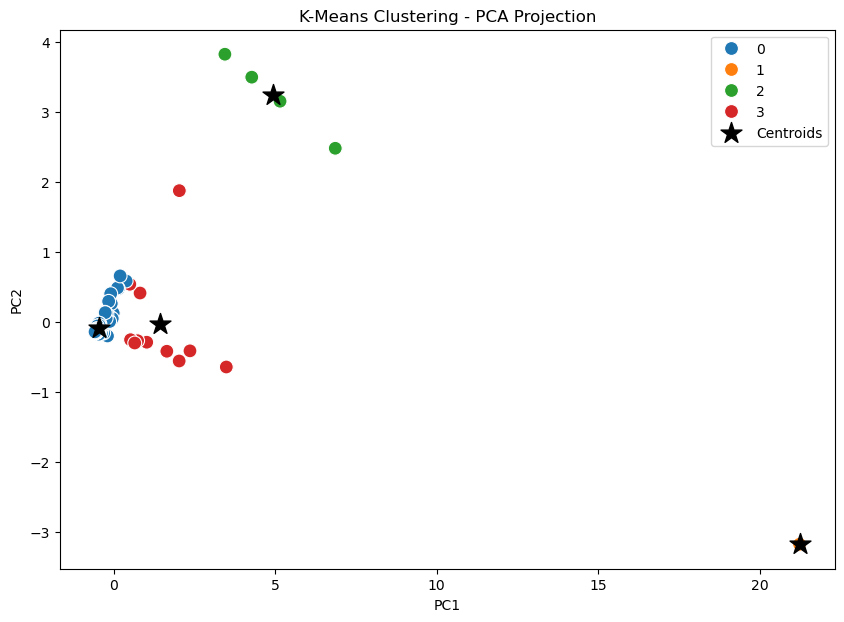

In [20]:

# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=100)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=250, marker='*', label='Centroids')
plt.title("K-Means Clustering - PCA Projection")
plt.legend()
plt.show()